# COMUNICACIONES DIGITALES
> Máster en Ingeniería de Telecomunicación<br>
> Curso 2021/22

## Práctica 3a - Acceso al medio (I)

En esta práctica vamos a ver un ejemplo básico de técnica de espectro ensanchado mediante secuencia directa. 
Lo que haremos será sencillamente generar una señal binaria a transmitir, ensancharla por un factor *chips*, y codificarla mutiplicándola por un código. En recepción desharemos esta codificación y recuperaremos el mensaje transmitido tal cual. 
 

### 0 - PARÁMETROS DE CONFIGURACIÓN

In [1]:
import numpy as np                  #Librería matemática
import matplotlib.pyplot as plt     #Librería gráfica
mensaje = "Prueba"                  #Mensaje a transmitir
chips = 5                           #Número de chips en los que se dividirá cada bit

### 1 - GENERACIÓN DEL MENSAJE
Generamos un mensaje que será la entrada a nuestro sistema

In [2]:
bits_fuente = np.array([int(k) for k in ''.join(format(ord(i), '08b') for i in mensaje)])
Nbits = len(bits_fuente)
print(f"Mensaje de entrada: '{mensaje}'")

Mensaje de entrada: 'Prueba'


### 2 - EXPANSIÓN DE LA SEÑAL
Expando la señal, de modo que cada bit se repite 'chips' veces. De paso hago una modulación sencilla, de forma que '0' -> -1 y '1' -> 1

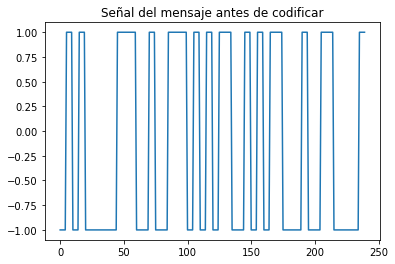

In [3]:
senal_fuente = 2*bits_fuente.repeat(chips)-1
plt.plot(senal_fuente)
plt.title("Señal del mensaje antes de codificar")
plt.show()

### 3 - GENERACIÓN DE LA SEÑAL DS
Generamos el código del usuario, y multiplico la señal por él. El resultado es la señal que se va a transmitir por el canal

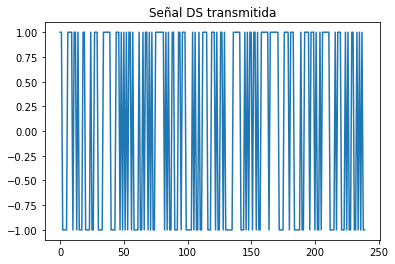

In [4]:
codigo = 2*np.random.randint(2,size=Nbits*chips)-1
senal_tx = senal_fuente*codigo
plt.plot(senal_tx)
plt.title("Señal DS transmitida")
plt.show()

### 4 - TRANSMISIÓN

In [5]:
from Canal import canalAWGN
N0 = 0.5
sigma = pow(N0/2, 0.5)
senal_rx = canalAWGN(senal_tx, sigma)

### 5 - DECODIFICACIÓN


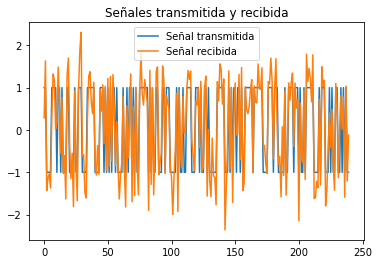

In [6]:
bits_rx = senal_rx*codigo
plt.plot(senal_tx)
plt.plot(senal_rx)
plt.title("Señales transmitida y recibida")
plt.legend(["Señal transmitida","Señal recibida"])
plt.show()

### 6 - SALIDA FINAL


In [7]:
matriz_decisor = np.reshape(bits_rx,(-1,chips)).sum(1)
decisor = "".join(["0" if i<0 else "1" for i in matriz_decisor])
salida = ""
for i in range(0,len(decisor),8):
    salida += chr(int(decisor[i:i+8],2))
print(f"Mensaje recibido: '{salida}'")

Mensaje recibido: 'Prueba'
